<a href="https://colab.research.google.com/github/pragyan2905/Skin-Cancer-Detection/blob/main/baseline_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install opendatasets

In [3]:
import opendatasets as od

In [5]:
url = "https://www.kaggle.com/datasets/kmader/skin-cancer-mnist-ham10000"
od.download(url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: qwertypragyan2905
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/kmader/skin-cancer-mnist-ham10000


100%|██████████| 5.20G/5.20G [09:29<00:00, 9.80MB/s]

In [6]:
import pandas as pd

metadata_path = './skin-cancer-mnist-ham10000/HAM10000_metadata.csv'
df = pd.read_csv(metadata_path)

print(df.head())
print(df.info())

     lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB
None


dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64


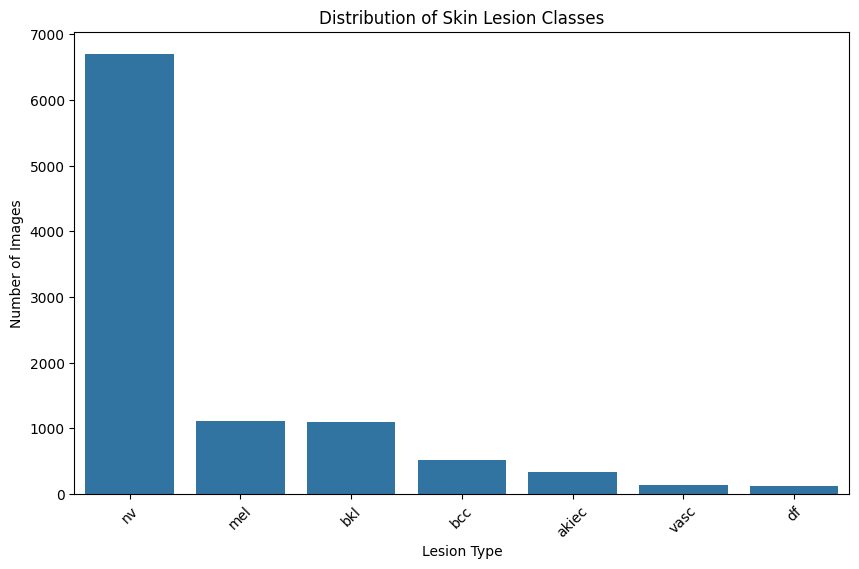

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

class_counts = df['dx'].value_counts()
print(class_counts)

plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Distribution of Skin Lesion Classes')
plt.xlabel('Lesion Type')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()

In [8]:
import os
from glob import glob

base_dir = './skin-cancer-mnist-ham10000/'
image_paths = {os.path.splitext(os.path.basename(x))[0]: x
                 for x in glob(os.path.join(base_dir, '*', '*.jpg'))}
df['path'] = df['image_id'].map(image_paths.get)

In [9]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

df['label'] = LabelEncoder().fit_transform(df['dx'])

y = to_categorical(df['label'])

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(df['path'], y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, Activation

IMAGE_SIZE = 128

model = Sequential([

    Conv2D(32, (3, 3), padding='same', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(128, (3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    Flatten(),
    Dense(512),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    16,777,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,877,511 (64.38 MB)

 Trainable params: 16,876,039 (64.38 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [13]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


model_checkpoint = ModelCheckpoint(
    filepath='best_baseline_model.keras',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True
)

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd

train_df = pd.DataFrame({'path': X_train.values, 'label': [str(list(l)) for l in y_train]})
val_df = pd.DataFrame({'path': X_val.values, 'label': [str(list(l)) for l in y_val]})


datagen = ImageDataGenerator(rescale=1./255.)

train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='path',
    y_col='label',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='path',
    y_col='label',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)


history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[model_checkpoint, early_stopping]
)

Found 7010 validated image filenames belonging to 7 classes.
Found 1502 validated image filenames belonging to 7 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - accuracy: 0.5807 - loss: 1.3388
Epoch 1: val_accuracy improved from -inf to 0.26365, saving model to best_baseline_model.keras
220/220 ━━━━━━━━━━━━━━━━━━━━ 95s 380ms/step - accuracy: 0.5810 - loss: 1.3376 - val_accuracy: 0.2636 - val_loss: 1.5111
Epoch 2/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step - accuracy: 0.7023 - loss: 0.8695
Epoch 2: val_accuracy improved from 0.26365 to 0.66644, saving model to best_baseline_model.keras
220/220 ━━━━━━━━━━━━━━━━━━━━ 54s 244ms/step - accuracy: 0.7023 - loss: 0.8693 - val_accuracy: 0.6664 - val_loss: 0.8986
Epoch 3/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - accuracy: 0.7192 - loss: 0.7640
Epoch 3: val_accuracy improved from 0.66644 to 0.69041, saving model to best_baseline_model.keras
220/220 ━━━━━━━━━━━━━━━━━━━━ 53s 242ms/step - accuracy: 0.7192 - loss: 0.7639 - val_accuracy: 0.6904 - val_loss: 0.9660
Epoch 4/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.7459 - loss: 0.68

Found 1503 validated image filenames belonging to 7 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 245ms/step
Classification Report:
                                                                                                                         precision    recall  f1-score   support

[np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(1.0)]       0.72      0.59      0.65        22
[np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(1.0), np.float64(0.0)]       0.86      0.92      0.89      1006
[np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(0.0)]       0.44      0.25      0.31       167
[np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(0.0), np.float64(0.0)]       0.50      0.35      0.41        17
[np.float64(0.0), np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0)]       0.4

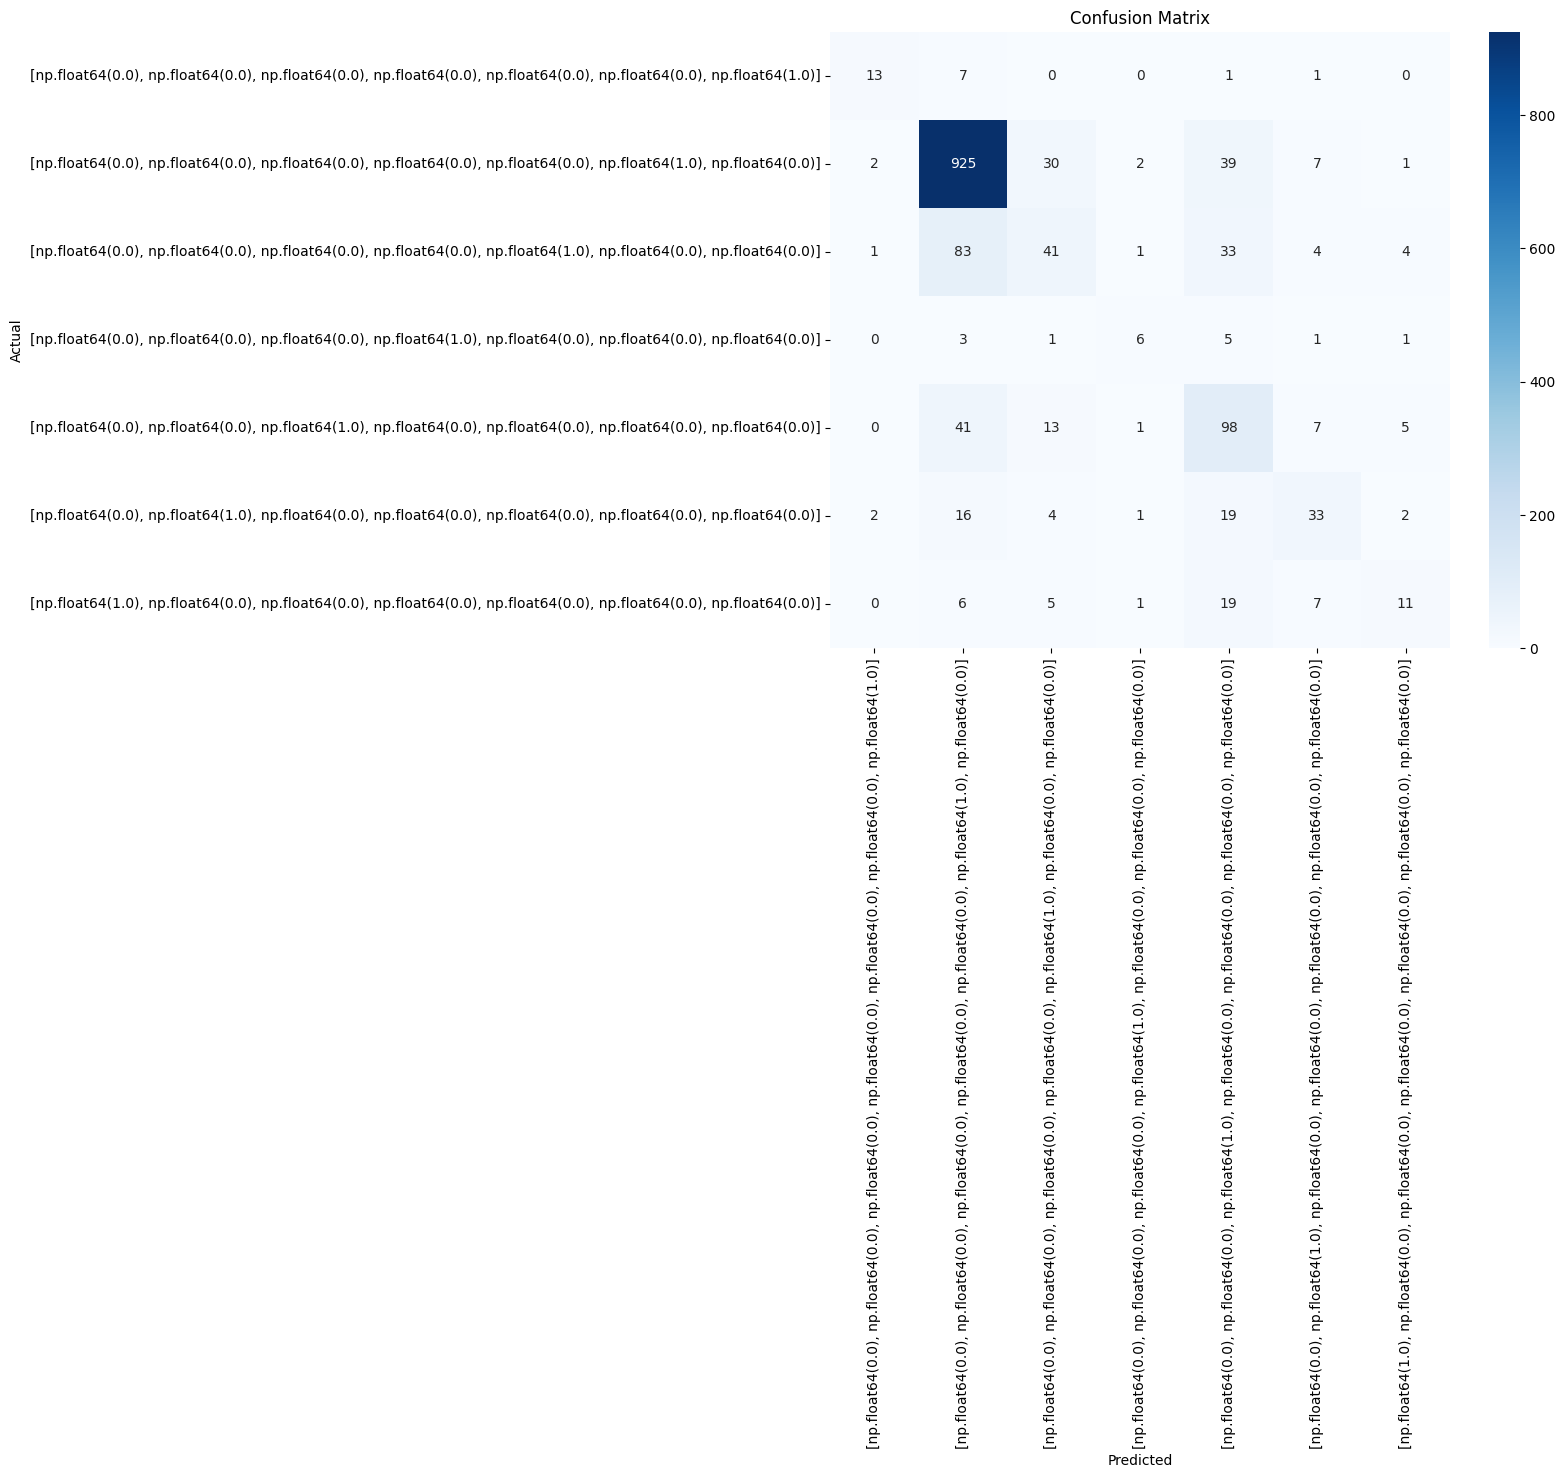

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

best_model = load_model('best_baseline_model.keras')

test_df = pd.DataFrame({'path': X_test.values, 'label': [str(list(l)) for l in y_test]})

test_datagen = ImageDataGenerator(rescale=1./255.)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='path',
    y_col='label',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

predictions = best_model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

print("Classification Report:")
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

print("\nConfusion Matrix:")
cm = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
import os
from google.colab import drive
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

drive.mount('/content/drive')

drive_path = '/content/drive/MyDrive/Skin_Cancer_Project/best_baseline_model.keras'

output_dir = os.path.dirname(drive_path)
os.makedirs(output_dir, exist_ok=True)


model_checkpoint_drive = ModelCheckpoint(
    filepath=drive_path,
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

best_model = load_model('best_baseline_model.keras')

best_model.save(drive_path)
print(f"Model saved to your Google Drive at: {drive_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model saved to your Google Drive at: /content/drive/MyDrive/Skin_Cancer_Project/best_baseline_model.keras
